In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heart_df=pd.read_csv("resources/heart_cleaner.csv")
heart_df.head()

,id,age (years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height (feet),weight (pounds),inches,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,5.51,137,66.141732,22.015308
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,5.12,187,61.417323,34.850994
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,5.41,141,64.960630,23.489511
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,5.54,181,66.535433,28.742724
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,5.12,123,61.417323,22.923381


In [3]:
heart_gender_df=heart_df.filter(['id', 'gender'], axis=1)
heart_gender_df.head(10)

,id,gender
0,0,2
1,1,1
2,2,1
3,3,2
4,4,1
5,8,1
6,9,1
7,12,2
8,13,1
9,14,1


In [4]:
heart_gender_df.gender.replace([1, 2], ['Female', 'Male'], inplace=True)
heart_gender_df.head()

,id,gender
0,0,Male
1,1,Female
2,2,Female
3,3,Male
4,4,Female


In [5]:
gender_df=heart_gender_df.groupby(['gender'],as_index=False).count()
gender_df.head()

,gender,id
0,Female,42770
1,Male,23069


In [6]:
gender_df.columns

Index(['gender', 'id'], dtype='object')

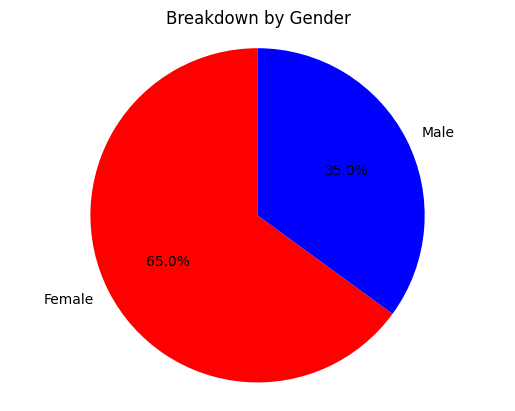

In [7]:
participants = gender_df.id
labels = gender_df.gender
colors = ["red", "blue"]


plt.title("Breakdown by Gender")
plt.pie(participants,colors=colors,
        labels=labels, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

In [8]:
conditions = [
    (heart_df['BMI'] <18.5), 
    (heart_df['BMI'] >=18.5) & (heart_df['BMI'] <=25),
    (heart_df['BMI'] >25)& (heart_df['BMI'] <=30),
    (heart_df['BMI'] >30)& (heart_df['BMI'] <=35),]
choices = ['Underweight','Healthy', 'Overweight', 'Obese' ]
heart_df['bmi category']=np.select(conditions, choices, default='Severely Obese')
heart_df.head()

,id,age (years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height (feet),weight (pounds),inches,BMI,bmi category
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,5.51,137,66.141732,22.015308,Healthy
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,5.12,187,61.417323,34.850994,Obese
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,5.41,141,64.960630,23.489511,Healthy
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,5.54,181,66.535433,28.742724,Overweight
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,5.12,123,61.417323,22.923381,Healthy


In [9]:
bmi_df=heart_df.groupby(['bmi category'],as_index=False).count()
bmi_df.head()

,bmi category,id,age (years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height (feet),weight (pounds),inches,BMI
0,Healthy,25151,25151,25151,25151,25151,25151,25151,25151,25151,25151,25151,25151,25151,25151,25151,25151,25151
1,Obese,11723,11723,11723,11723,11723,11723,11723,11723,11723,11723,11723,11723,11723,11723,11723,11723,11723
2,Overweight,24329,24329,24329,24329,24329,24329,24329,24329,24329,24329,24329,24329,24329,24329,24329,24329,24329
3,Severely Obese,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047,4047
4,Underweight,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589


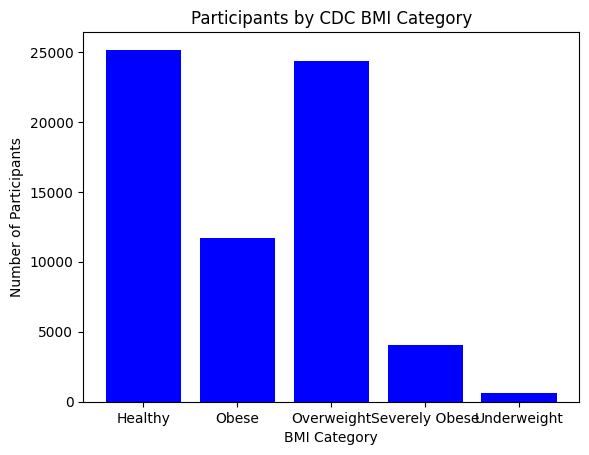

In [17]:
# Data Set 1 - Bar chart
category=bmi_df['bmi category']
x_axis = np.arange(0, len(category))


tick_locations = [x for x in x_axis]

plt.title("Participants by CDC BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Number of Participants")


plt.bar(x_axis, bmi_df.id, facecolor="blue")
plt.xticks(tick_locations, category)
plt.show()

In [18]:
smoker_df=heart_df.groupby(['smoke'],as_index=False).count()
smoker_df.head()

,smoke,id,age (years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,alco,active,cardio,height (feet),weight (pounds),inches,BMI,bmi category
0,0,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072
1,1,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767


In [19]:
smoker_df.smoke.replace([0, 1], ['No', 'Yes'], inplace=True)
smoker_df.head()

,smoke,id,age (years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,alco,active,cardio,height (feet),weight (pounds),inches,BMI,bmi category
0,No,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072,60072
1,Yes,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767


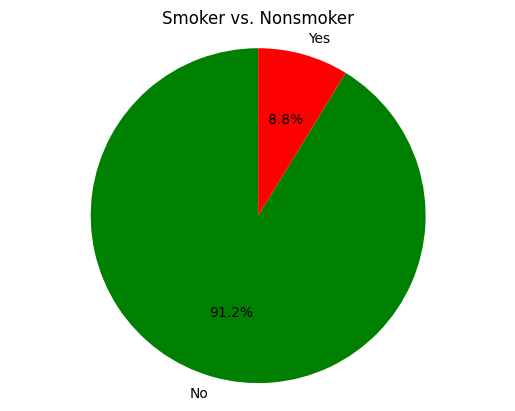

In [20]:
participants = smoker_df.id
labels = smoker_df.smoke
colors = ["green", "red"]


plt.title("Smoker vs. Nonsmoker")
plt.pie(participants,colors=colors,
        labels=labels, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

In [10]:
heart_df.columns

Index(['id', 'age (years)', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'height (feet)', 'weight (pounds)', 'inches', 'BMI', 'bmi category'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


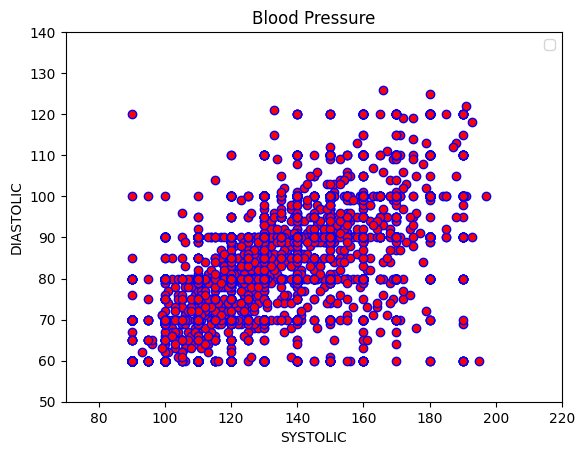

In [14]:
SYSTOLIC=heart_df['ap_hi']
DIASTOLIC=heart_df['ap_lo']
plt.title("Blood Pressure")
plt.xlabel("SYSTOLIC")
plt.ylabel("DIASTOLIC")

plt.xlim(70, 220)
plt.ylim(50, 140)

plt.scatter(SYSTOLIC, DIASTOLIC, marker="o", facecolors="red", edgecolors="blue")
plt.legend()
plt.show()